In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Based on the previous output, the correct file name is 'survey lung cancer.csv'
file_path = "survey lung cancer.csv"

# Load the latest version using dataset_load as recommended
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mysarahmadbhat/lung-cancer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("records:", df.to_string())

Using Colab cache for faster access to the 'lung-cancer' dataset.
records:     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER
0        M   69        1               2        2              1                1         2         1         2                  2         2                    2                      2           2         YES
1        M   74        2               1        1              1                2         2         2         1                  1         1                    2                      2           2         YES
2        F   59        1               1        1              2                1         2         1         2                  1         2                    2                      1           2          NO
3        M   63        2               2        2              1                1        

In [ ]:
import os

# List files in the dataset directory
dataset_directory = '/kaggle/input/lung-cancer'
if os.path.exists(dataset_directory):
    print("Files in the dataset directory:", os.listdir(dataset_directory))
else:
    print(f"Directory not found: {dataset_directory}")

Files in the dataset directory: ['survey lung cancer.csv']


## Create age groups

### Subtask:
Define age groups (periods of 10) and add a new column to the DataFrame indicating the age group for each individual.

**Reasoning**:
Define age bins and labels, then create a new 'Age_Group' column in the DataFrame using pd.cut().

In [ ]:
import numpy as np
import pandas as pd

# Define age bins (periods of 10)
max_age = df_lung_cancer['AGE'].max()
min_age = df_lung_cancer['AGE'].min() # Get the minimum age
age_bins = np.arange(min_age // 10 * 10, max_age + 10, 10) # Start bins from the beginning of the decade of the minimum age

# Define corresponding labels for age groups
age_labels = [f'{int(i)}-{int(i+9)}' for i in age_bins[:-1]]

# Create a new 'Age_Group' column using pd.cut() and make it ordered categorical
df_lung_cancer['Age_Group'] = pd.cut(df_lung_cancer['AGE'], bins=age_bins, labels=age_labels, right=False, ordered=True)

# Display the first few rows of the DataFrame with the new column
display(df_lung_cancer.to_string())

'    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER Age_Group\n0        M   69        1               2        2              1                1         2         1         2                  2         2                    2                      2           2         YES     60-69\n1        M   74        2               1        1              1                2         2         2         1                  1         1                    2                      2           2         YES     70-79\n5        F   75        1               2        1              1                2         2         2         2                  1         2                    2                      1           1         YES     70-79\n6        M   52        2               1        1              1                1         2         1         2        

**Reasoning**:
Filter out age groups 0-9, 10-19, and 20-29 from the DataFrame to exclude individuals under 30, then display the head of the filtered DataFrame.

In [ ]:
# Filter out age groups 0-9, 10-19, and 20-29
age_groups_to_exclude = ['0-9', '10-19', '20-29']
df_lung_cancer_filtered = df_lung_cancer[~df_lung_cancer['Age_Group'].isin(age_groups_to_exclude)].copy()

# Display the first few rows of the filtered DataFrame
display(df_lung_cancer_filtered.to_string())

'    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER Age_Group\n0        M   69        1               2        2              1                1         2         1         2                  2         2                    2                      2           2         YES     60-69\n1        M   74        2               1        1              1                2         2         2         1                  1         1                    2                      2           2         YES     70-79\n5        F   75        1               2        1              1                2         2         2         2                  1         2                    2                      1           1         YES     70-79\n6        M   52        2               1        1              1                1         2         1         2        

## Iterate and plot grouped bar charts

### Subtask:
Loop through each identified condition column. For each condition:
* Group the filtered data by the new age group column and gender, and count the number of individuals in each group.
* Create a grouped bar chart where the x-axis represents the filtered age groups, the bars are grouped by gender, and the y-axis shows the count of individuals.
* Generate a separate grouped bar chart for each condition.

**Reasoning**:
Iterate through the condition columns, group by age group and gender, count the occurrences, and create grouped bar charts for each condition colored by gender, adding appropriate titles, labels, and legends.

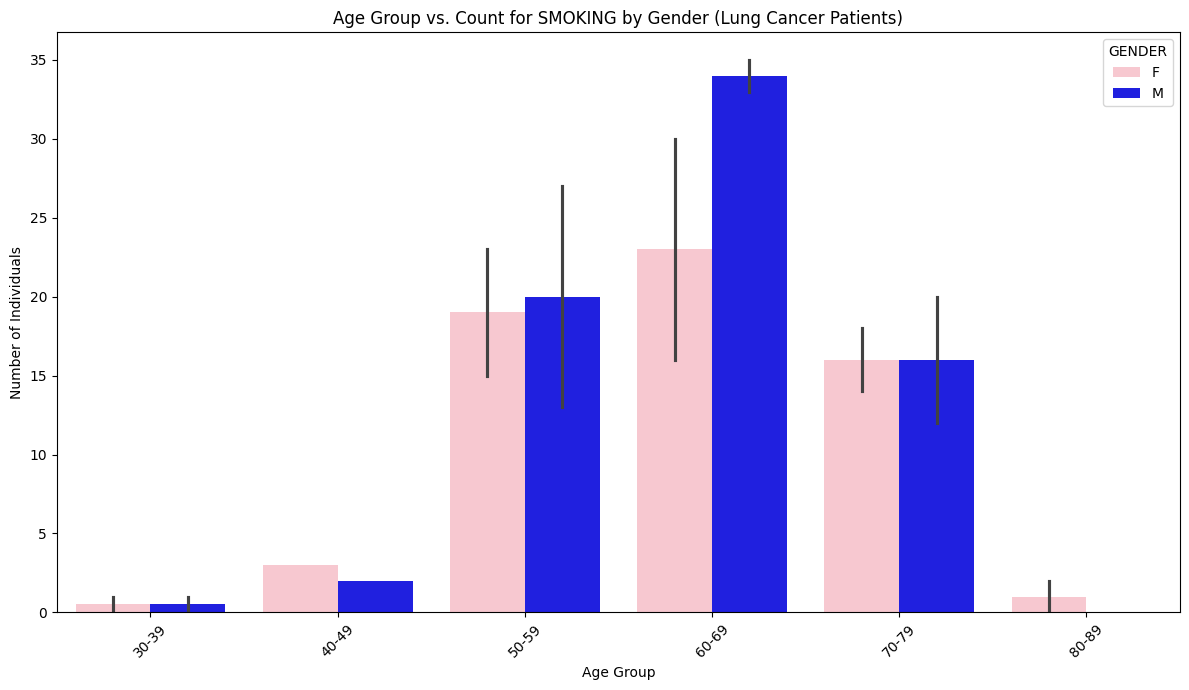

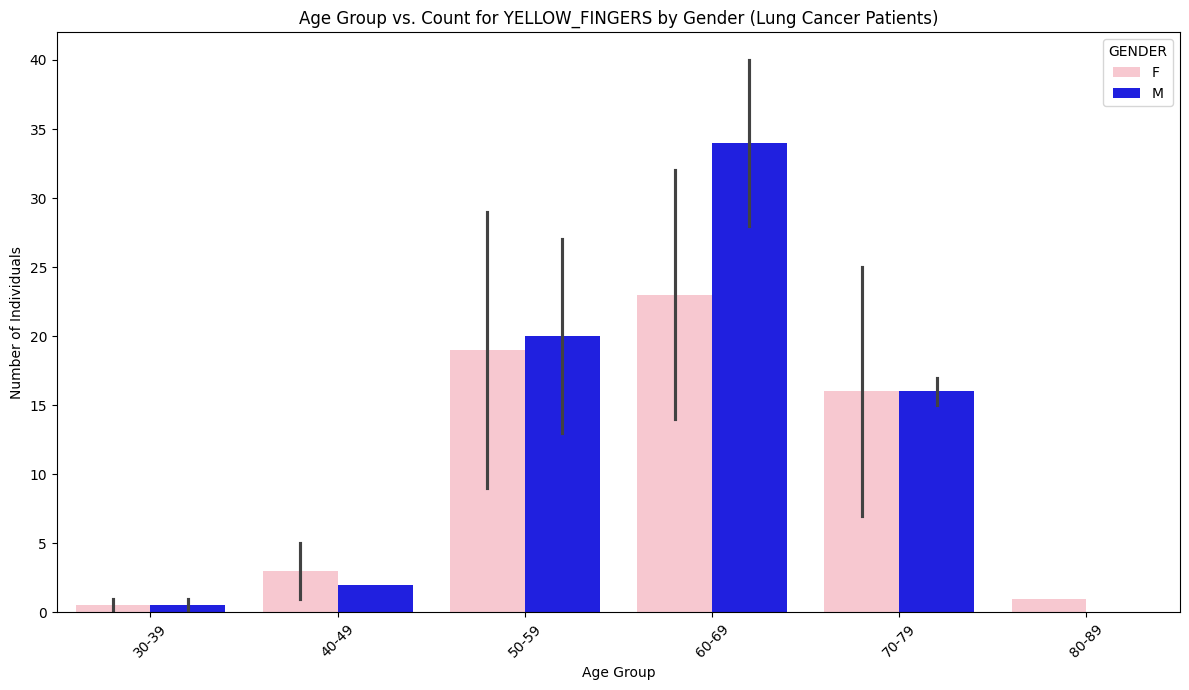

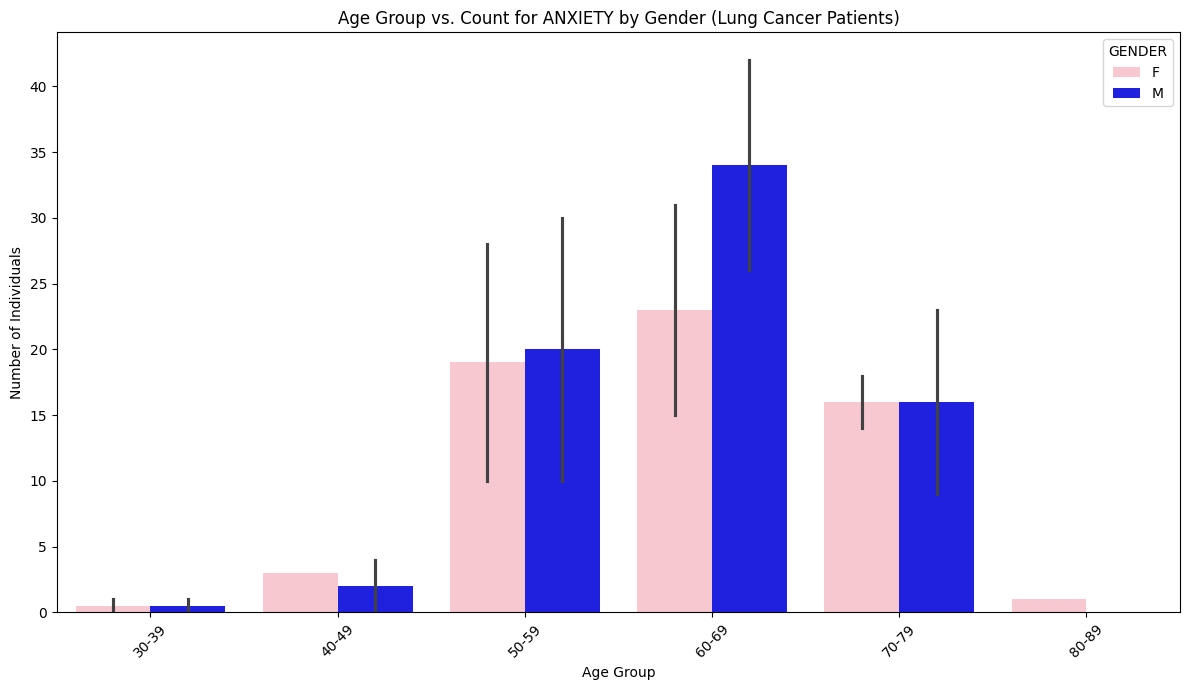

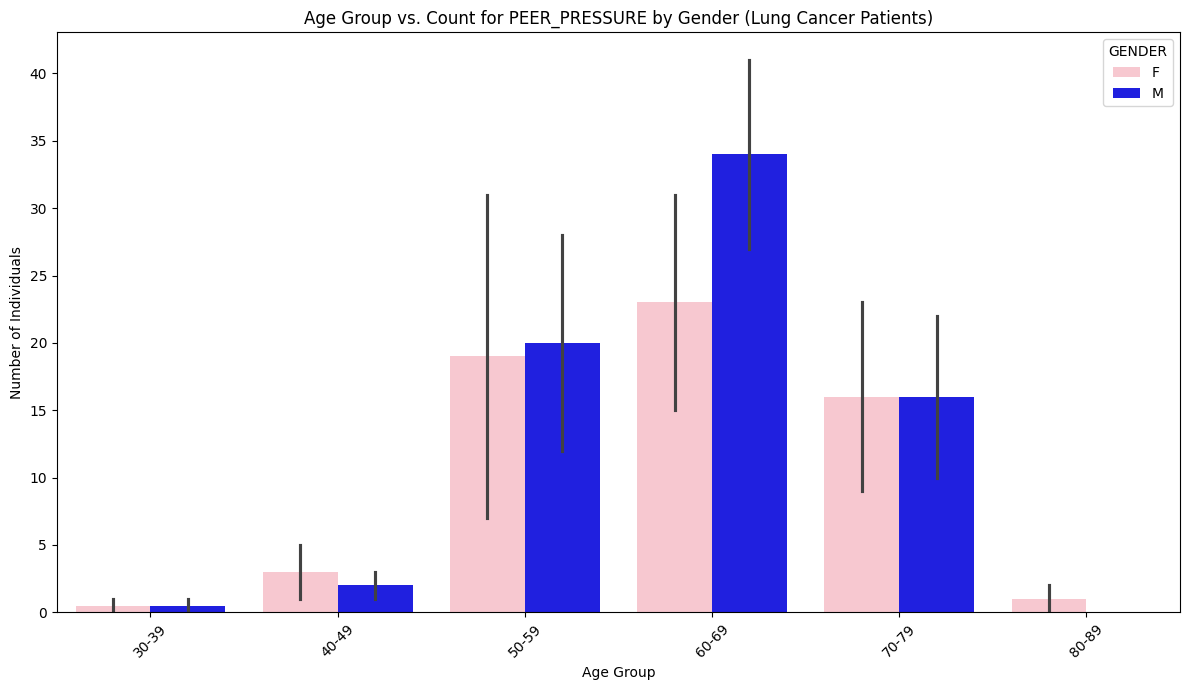

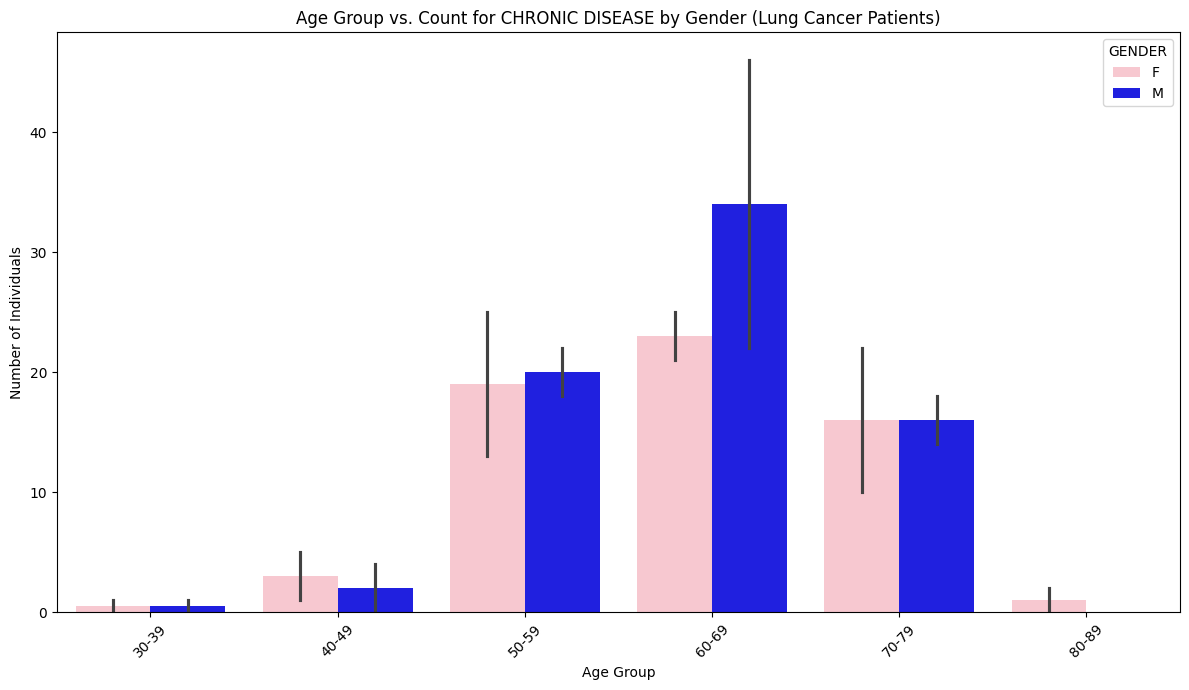

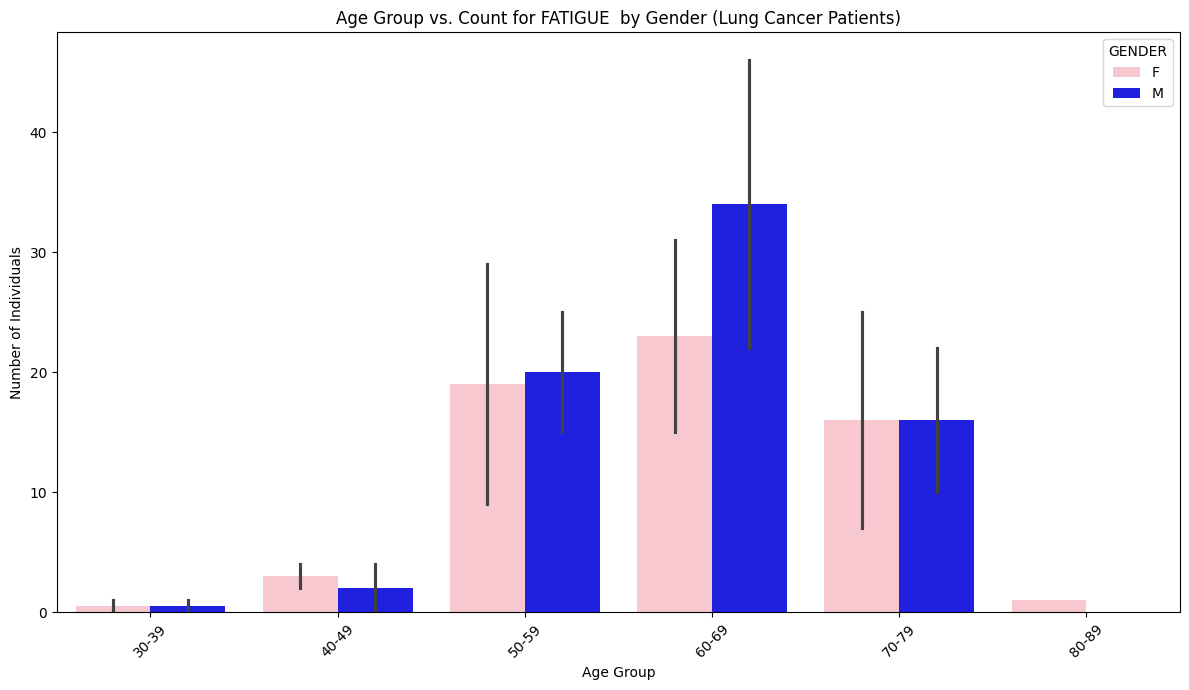

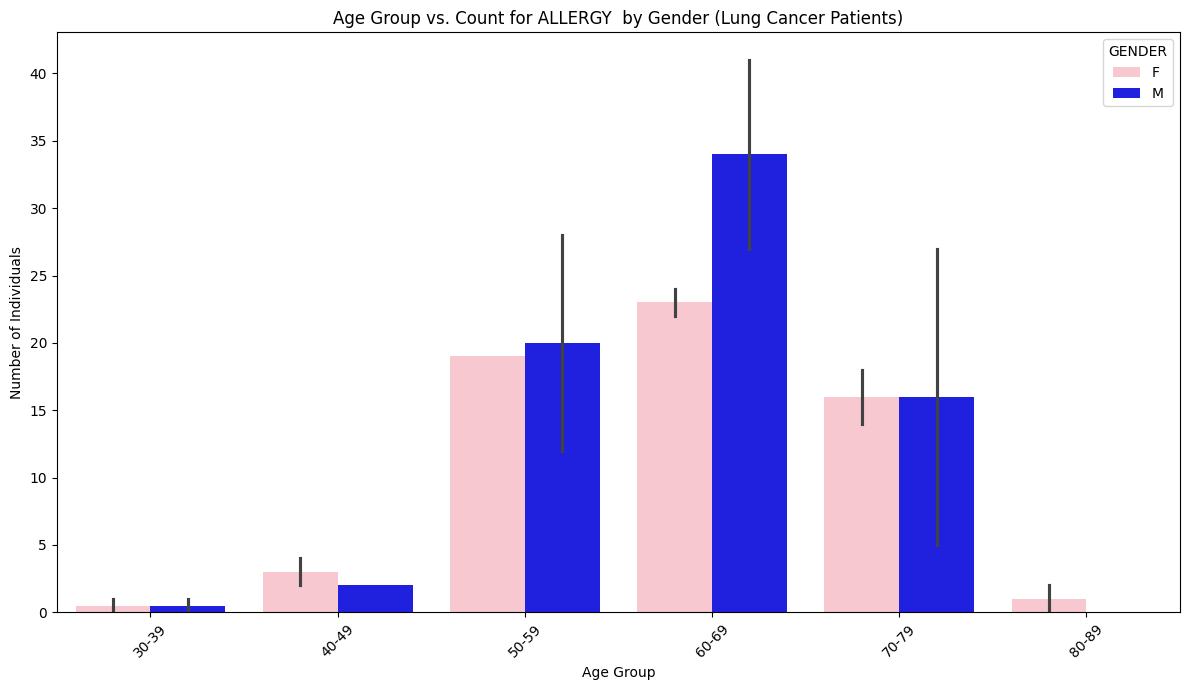

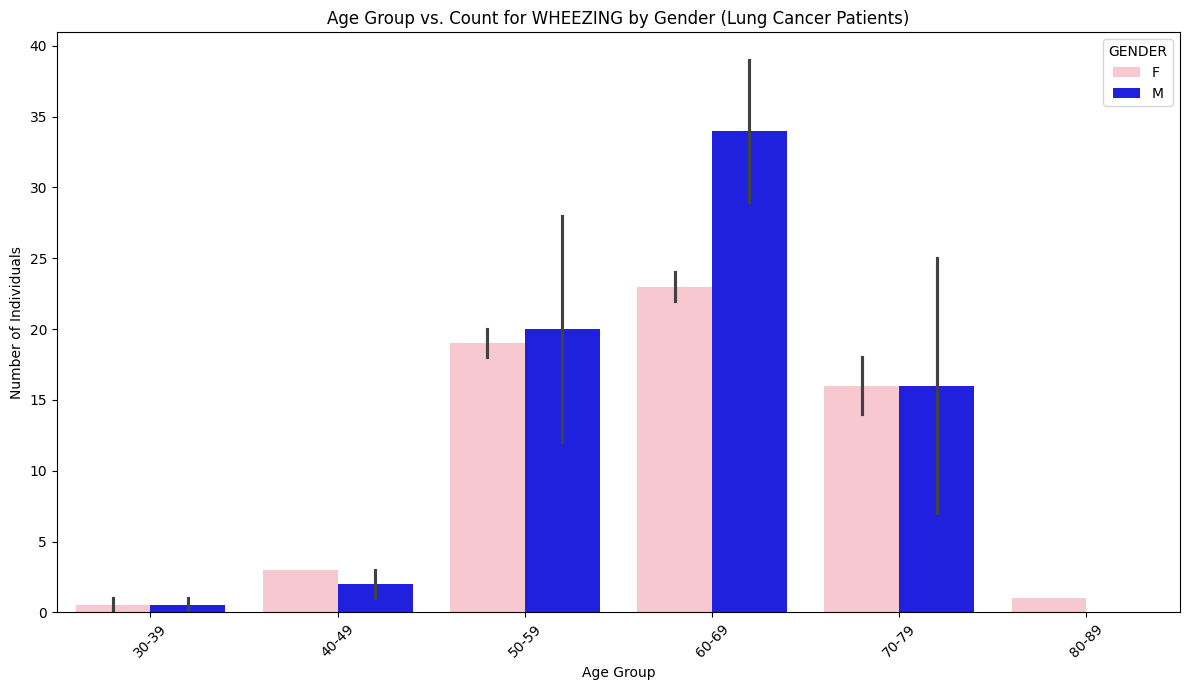

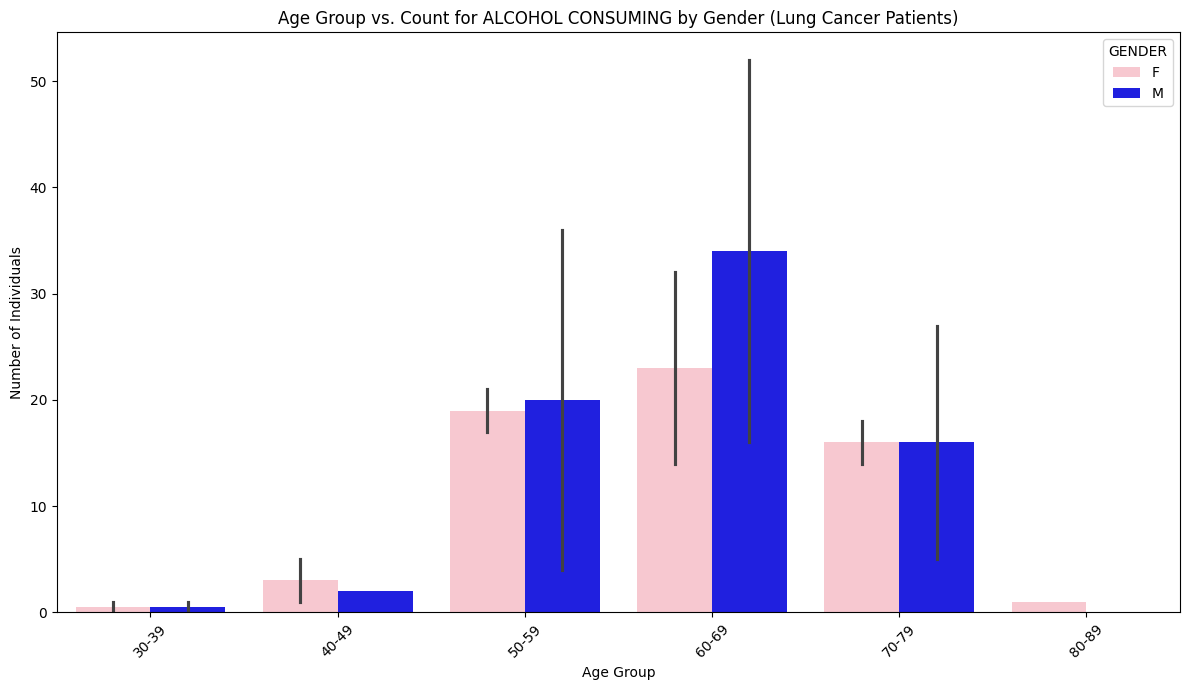

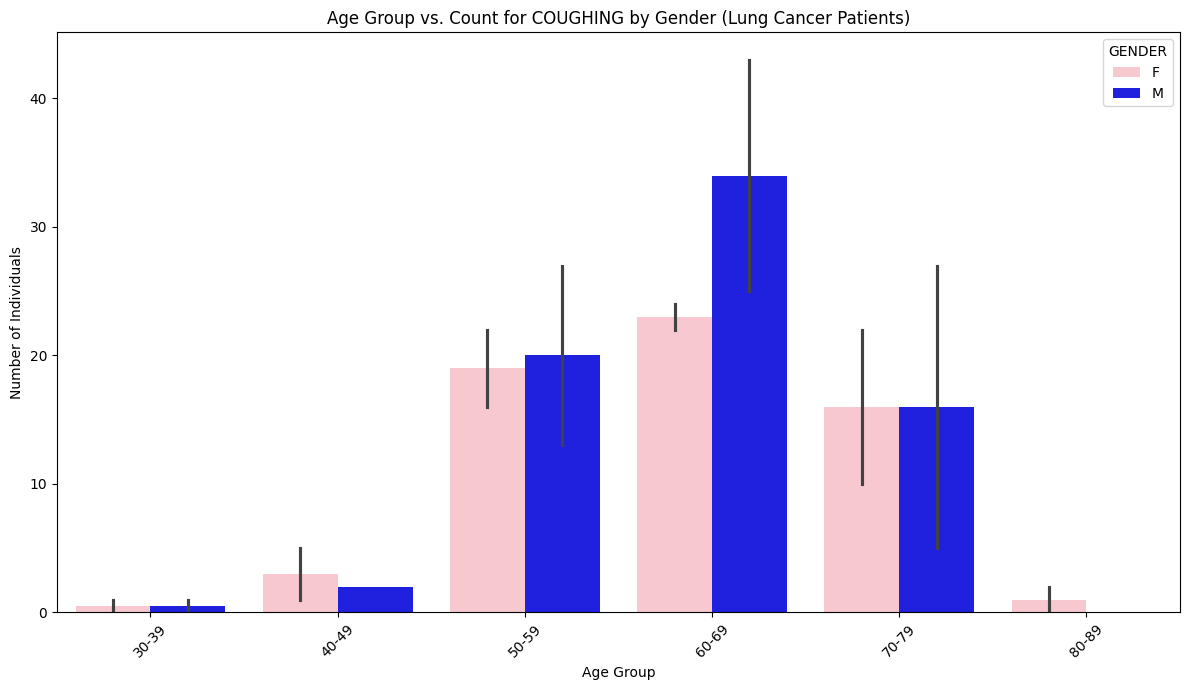

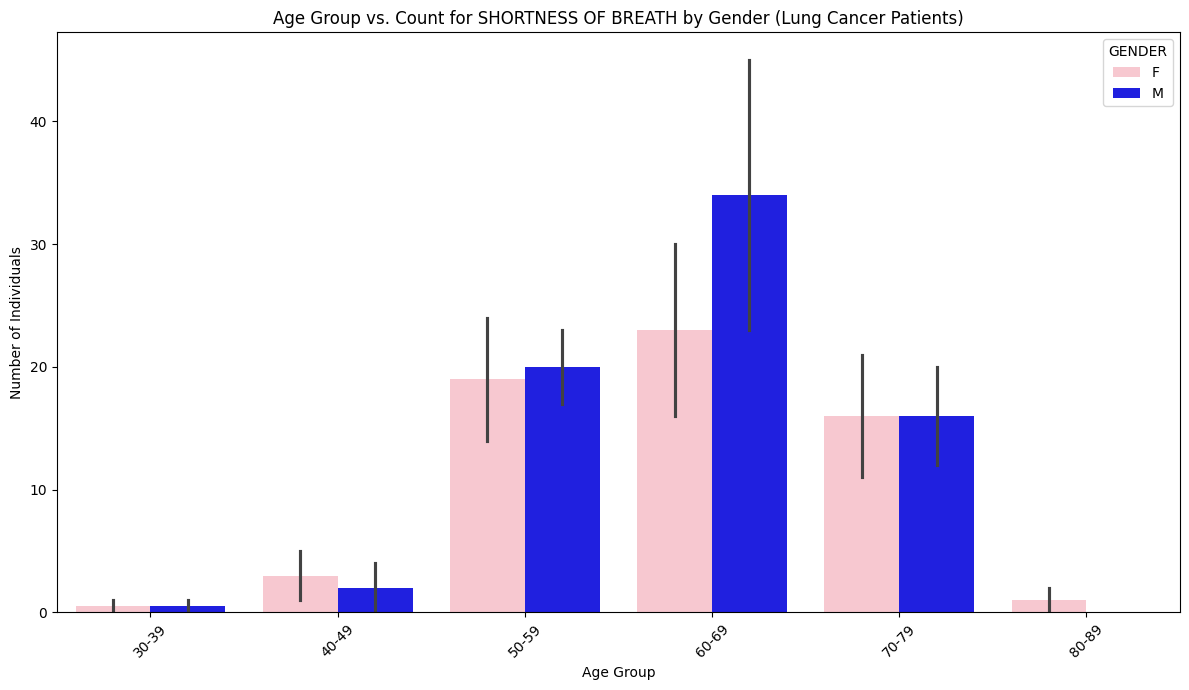

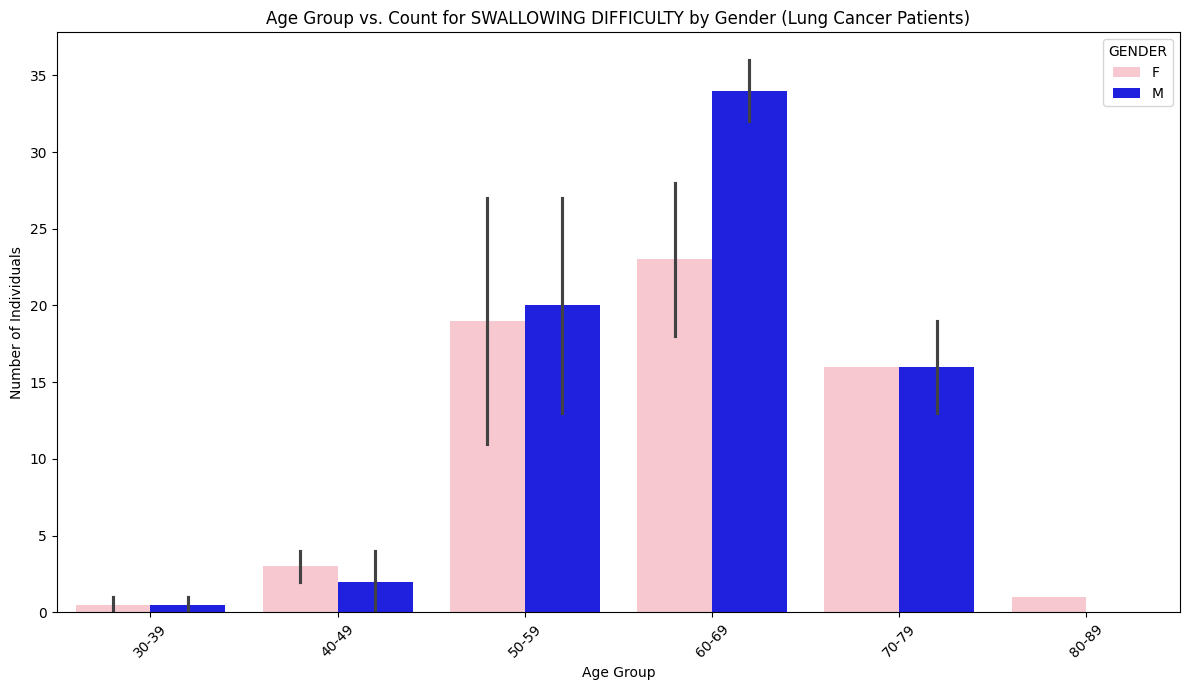

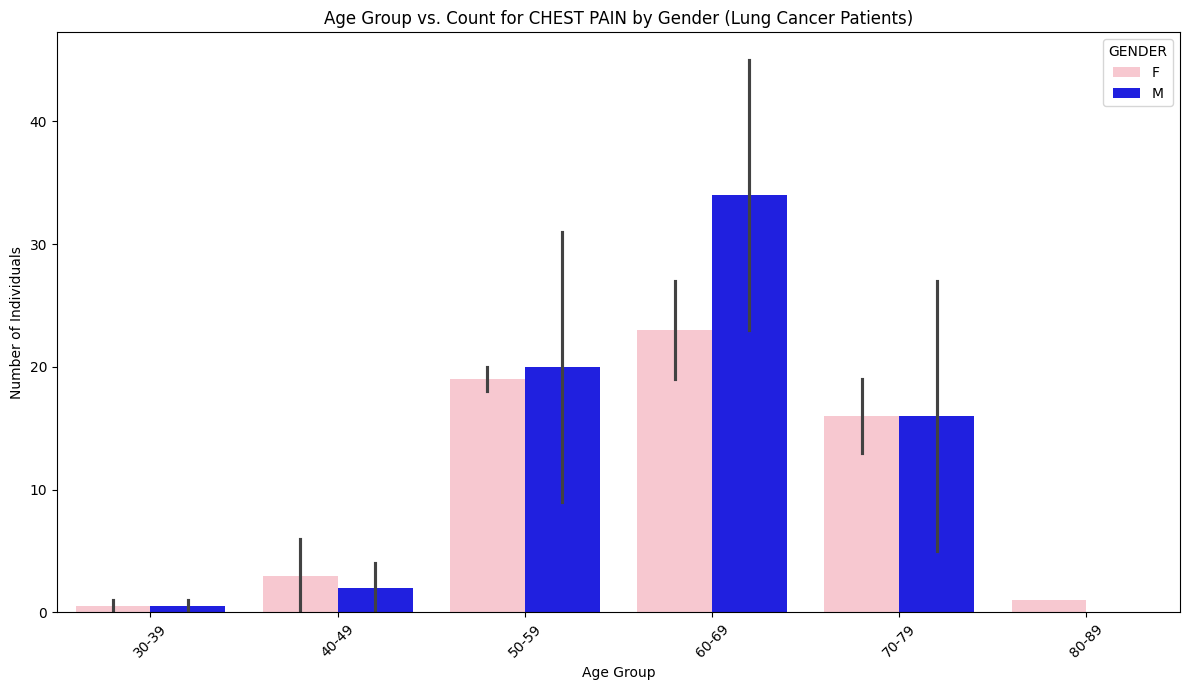

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for condition in condition_cols:
    grouped_data = df_lung_cancer_filtered.groupby(['Age_Group', 'GENDER', condition], observed=False).size().reset_index(name='Count')
    plt.figure(figsize=(12, 7))
    sns.barplot(data=grouped_data, x='Age_Group', y='Count', hue='GENDER', palette={'M': 'blue', 'F': 'pink'})
    plt.title(f'Age Group vs. Count for {condition} by Gender (Lung Cancer Patients)')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Individuals')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Iterate and plot grouped bar charts

### Subtask:
Loop through each identified condition column. For each condition:
* Group the filtered data by the new age group column and gender, and count the number of individuals in each group.
* Create a grouped bar chart where the x-axis represents the filtered age groups, the bars are grouped by gender, and the y-axis shows the count of individuals.
* Generate a separate grouped bar chart for each condition.

**Reasoning**:
Iterate through the condition columns, group by age group and gender, count the occurrences, and create grouped bar charts for each condition colored by gender, adding appropriate titles, labels, and legends.

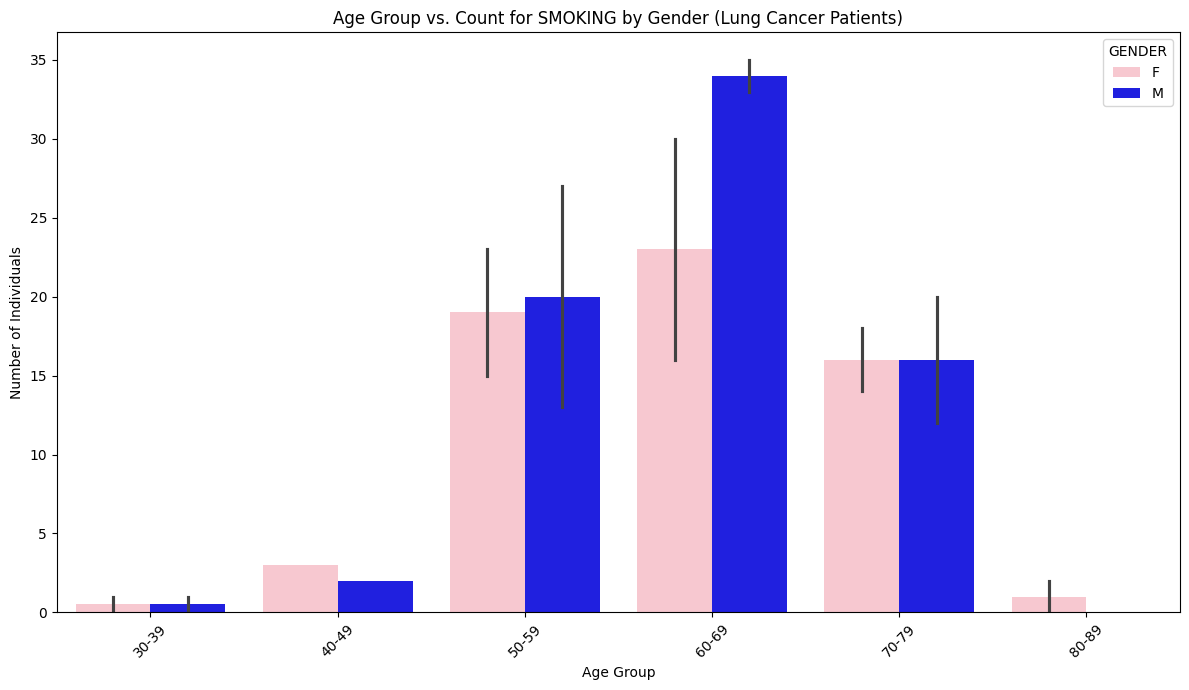

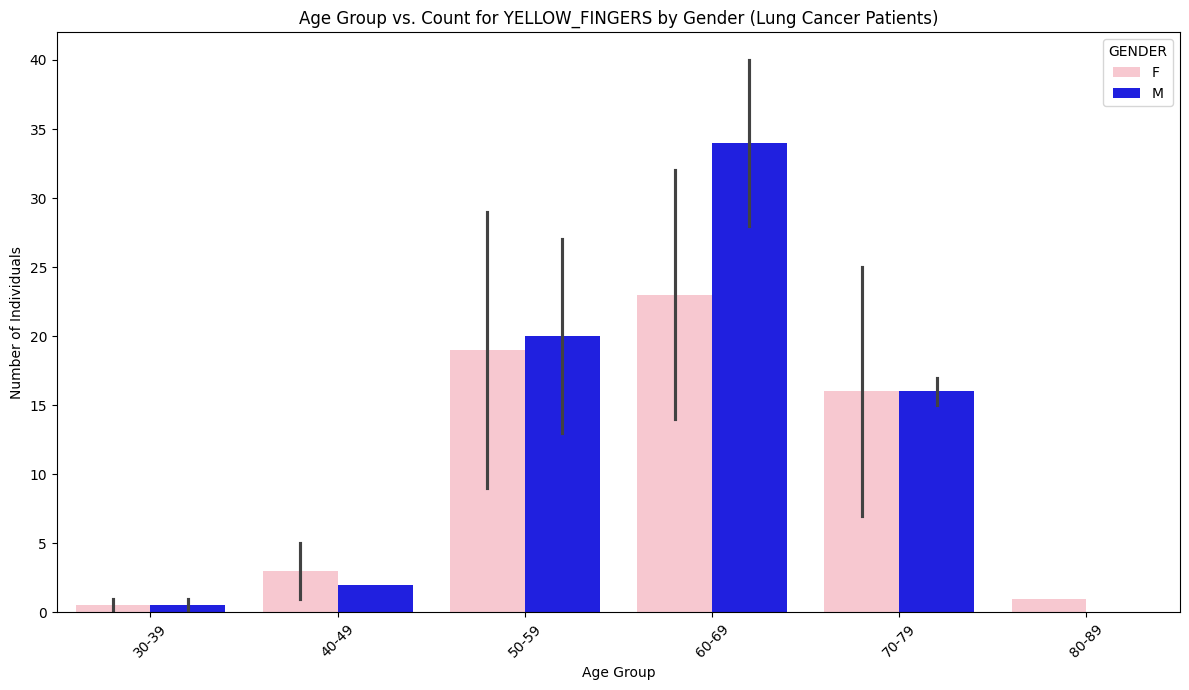

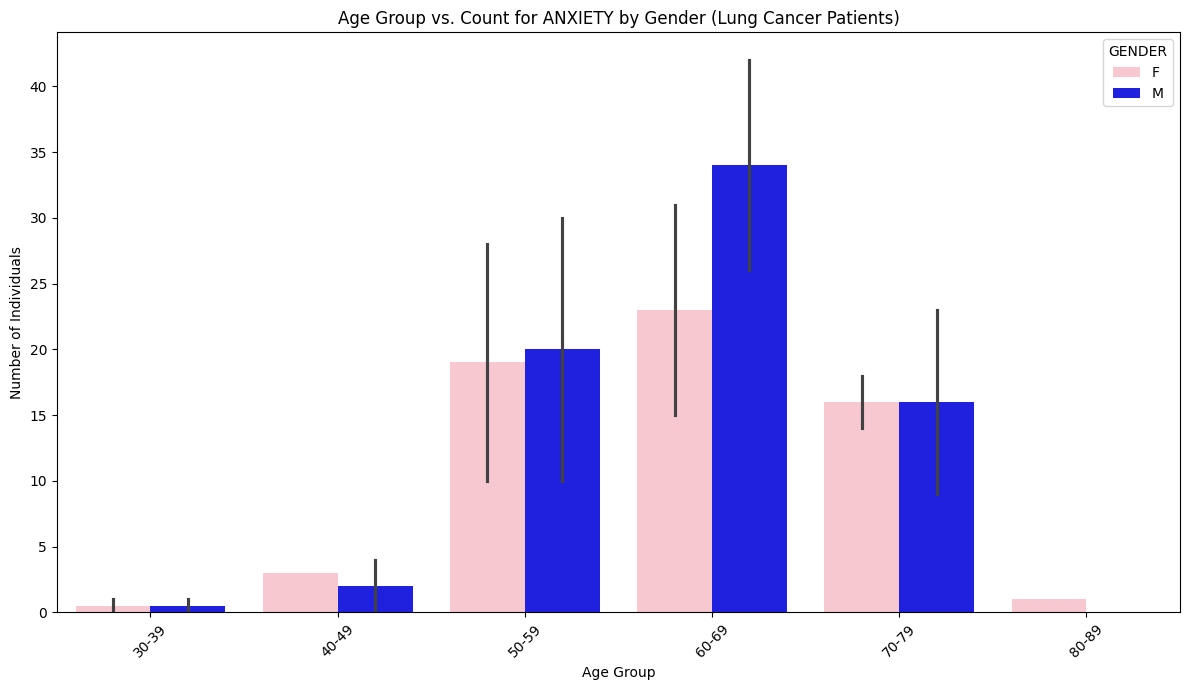

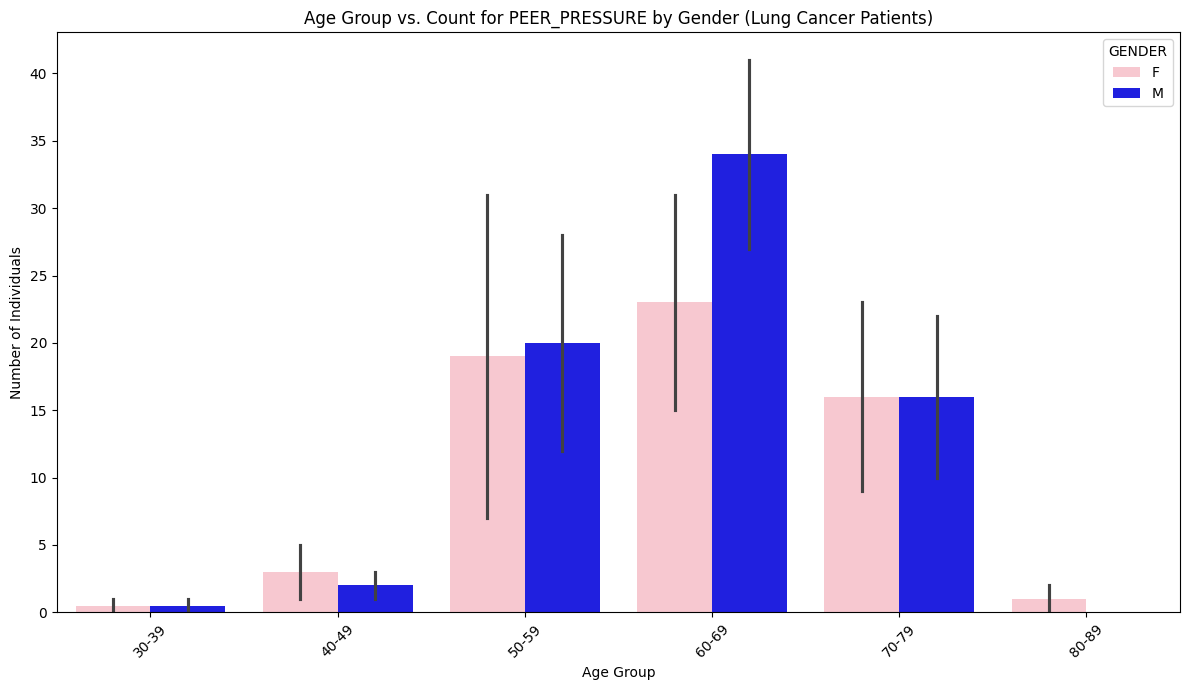

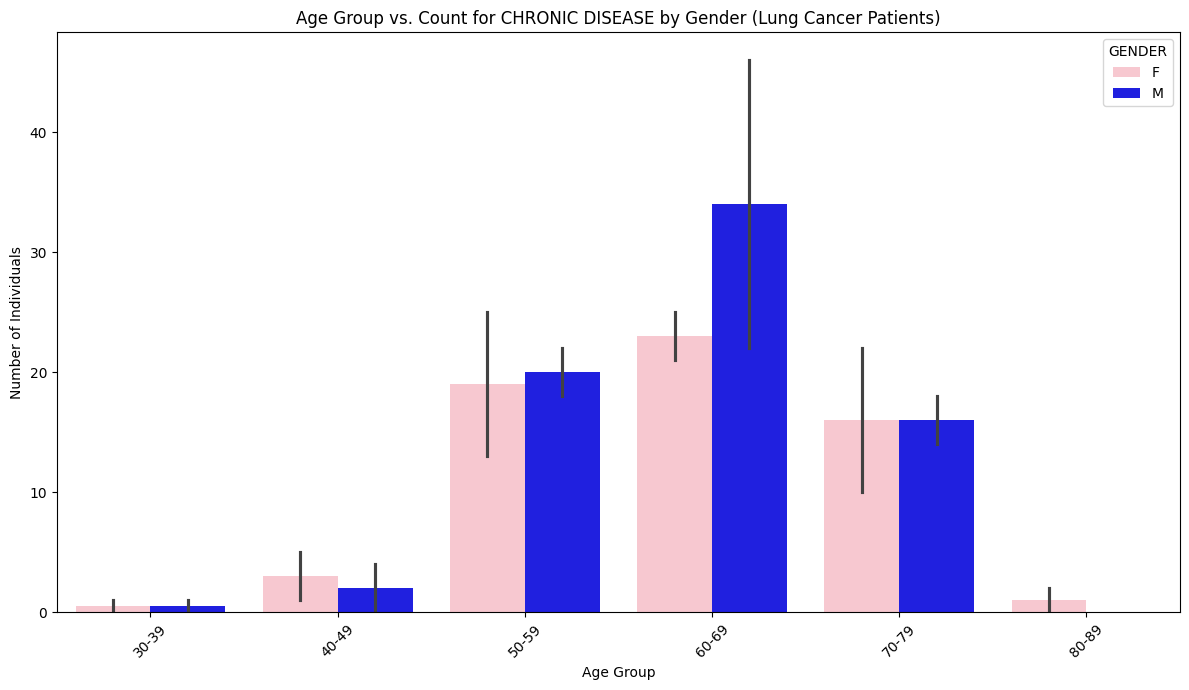

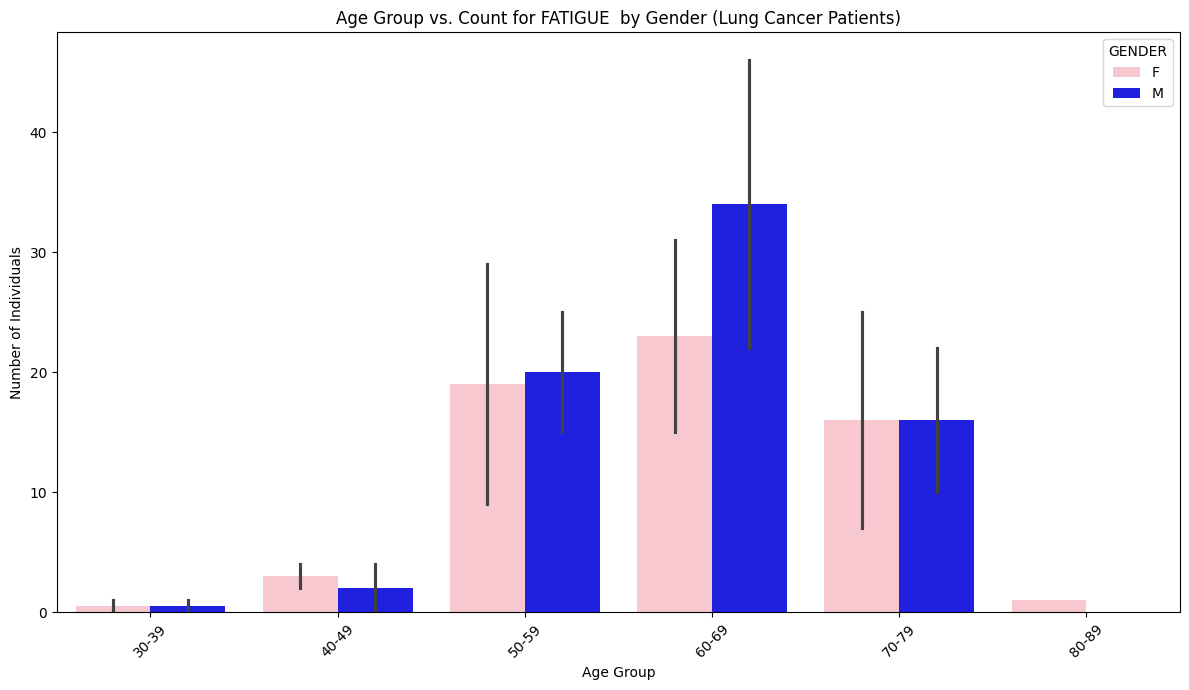

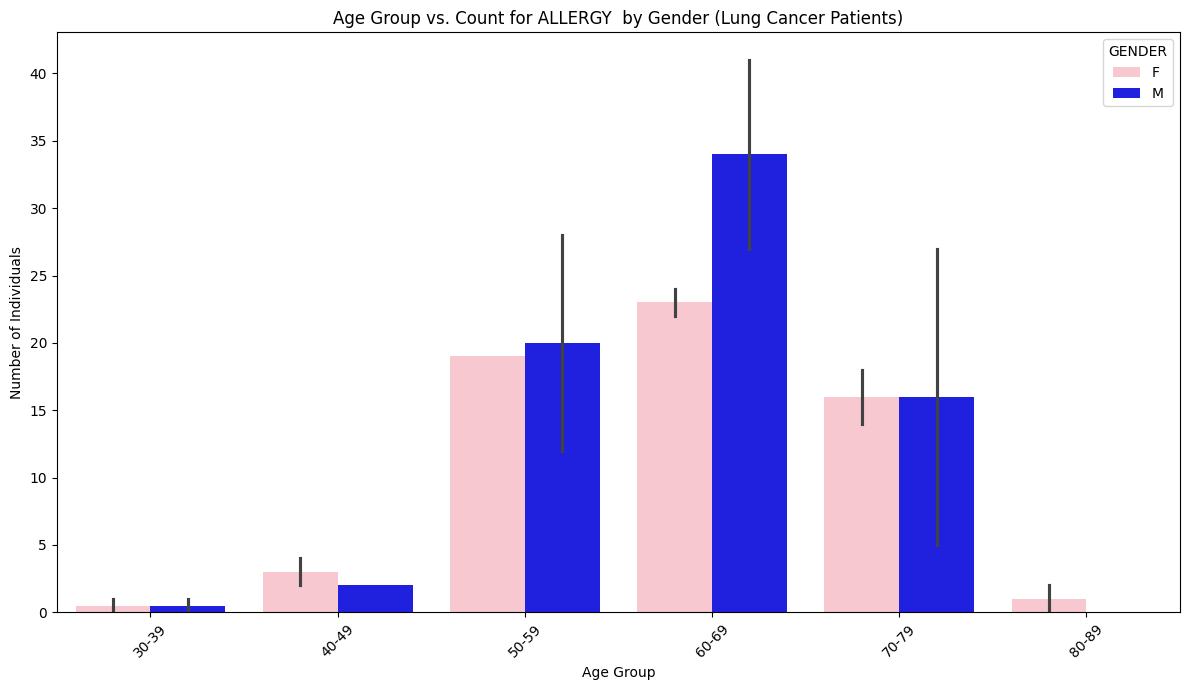

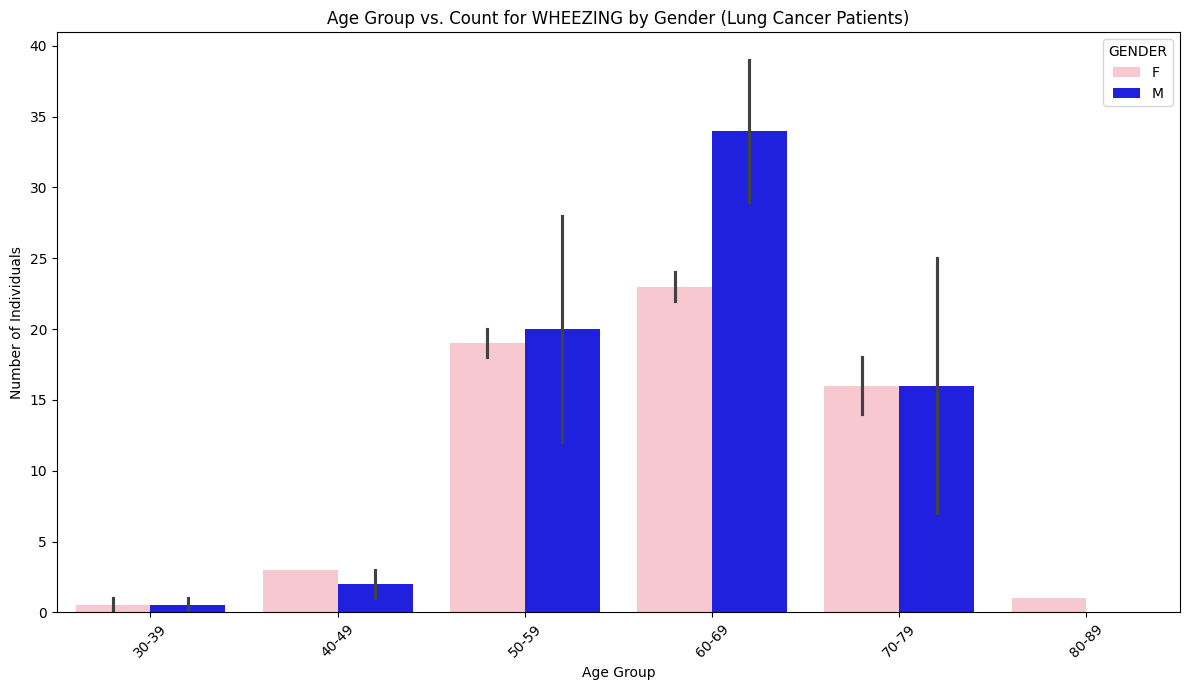

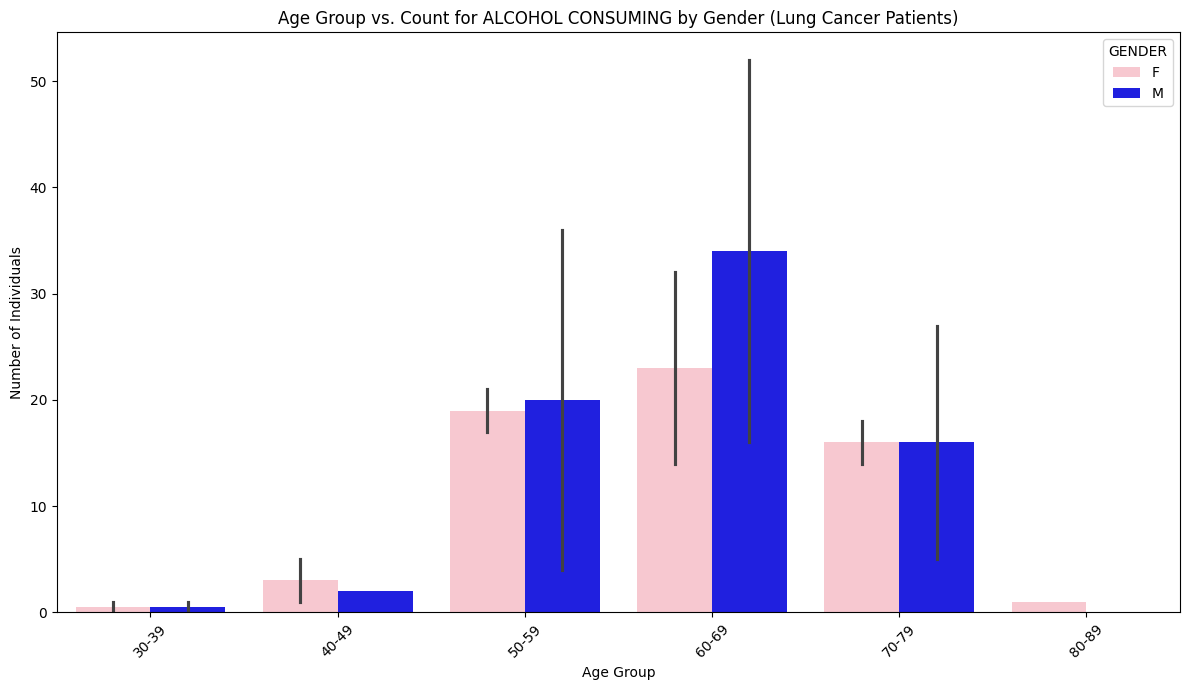

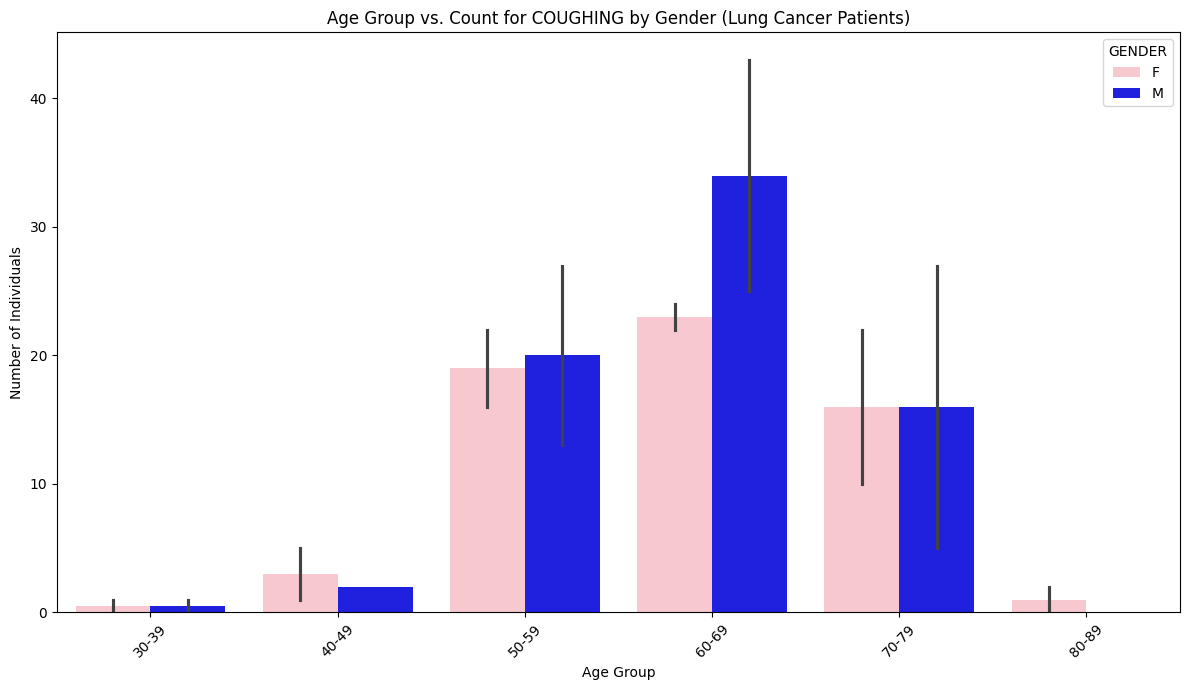

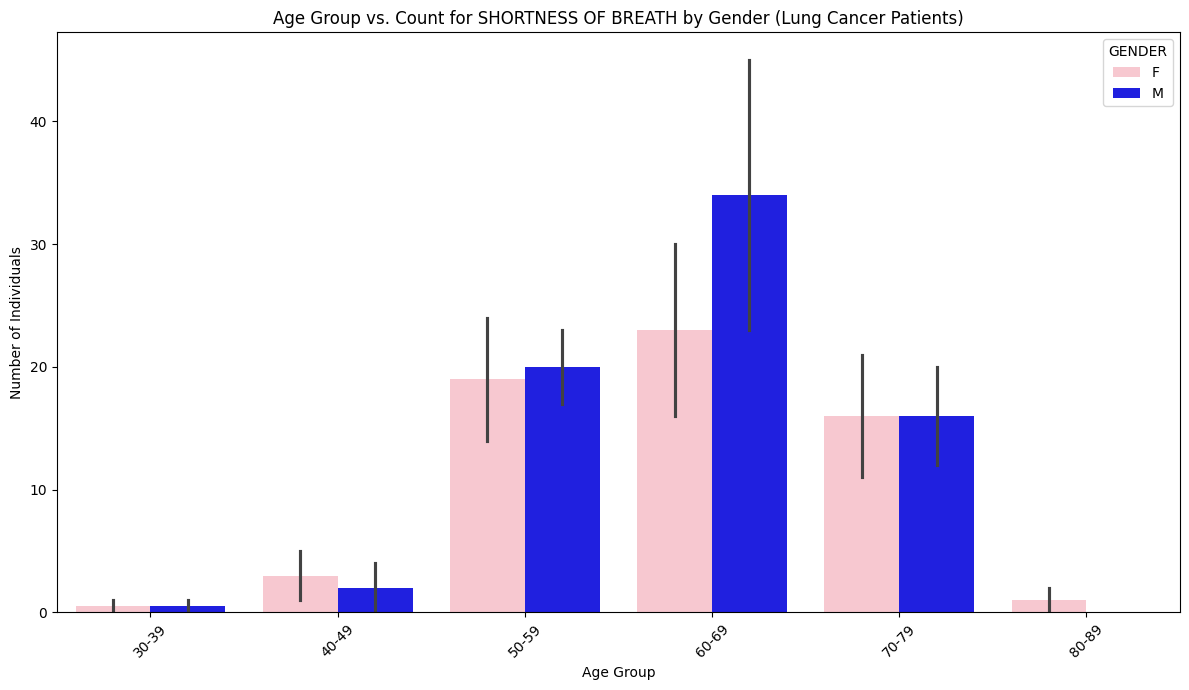

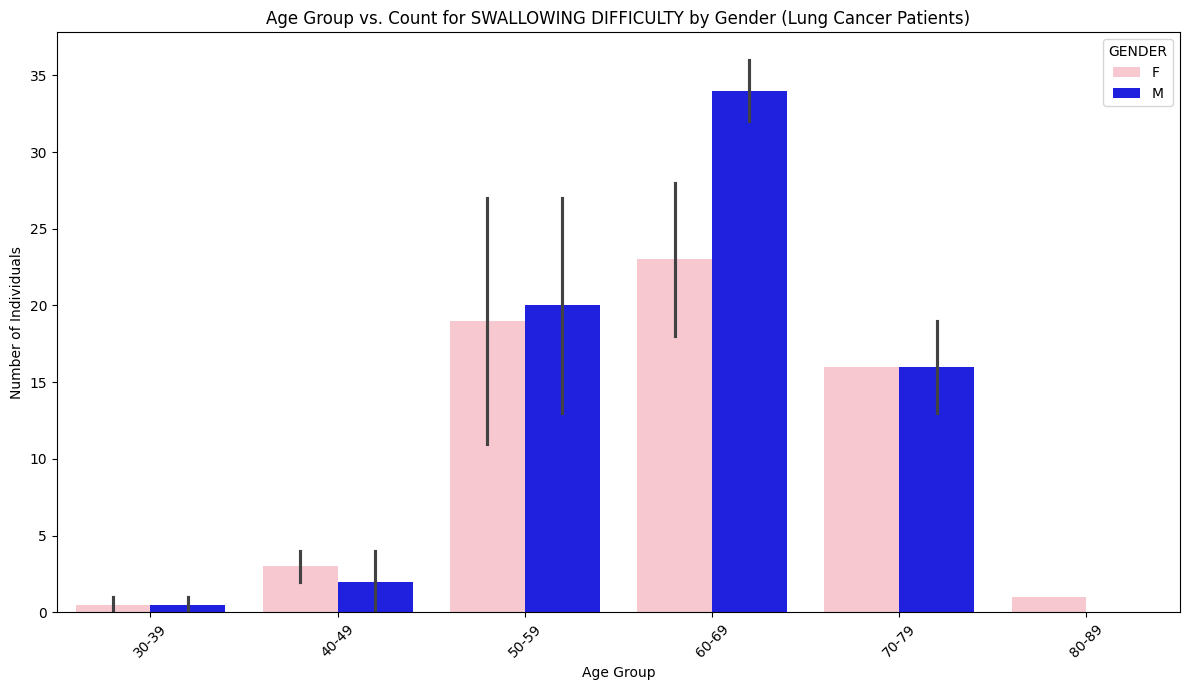

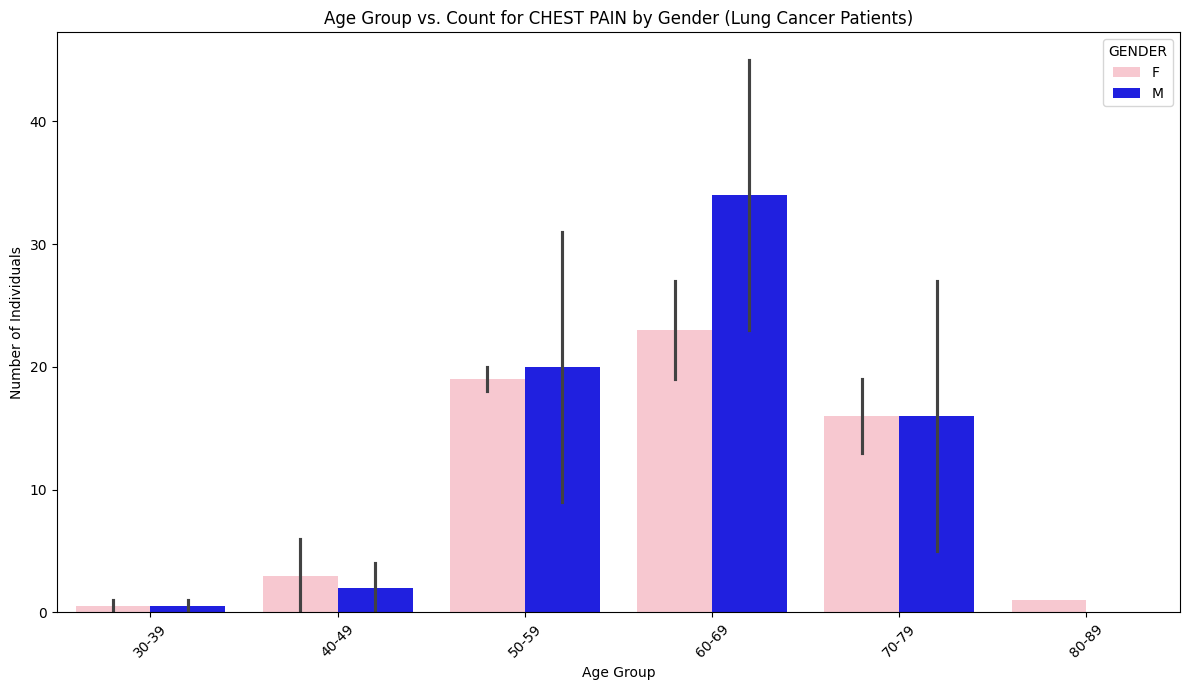

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for condition in condition_cols:
    grouped_data = df_lung_cancer.groupby(['Age_Group', 'GENDER', condition], observed=False).size().reset_index(name='Count')
    plt.figure(figsize=(12, 7))
    sns.barplot(data=grouped_data, x='Age_Group', y='Count', hue='GENDER', palette={'M': 'blue', 'F': 'pink'})
    plt.title(f'Age Group vs. Count for {condition} by Gender (Lung Cancer Patients)')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Individuals')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()